In [2]:
import os
import pandas as pd
from google.colab import drive
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
drive.mount('/content/drive')
dataset_path = '/content/drive/My Drive/data mining/Mall_Customers.csv'
data = pd.read_csv(dataset_path)
data.head(100)

Mounted at /content/drive


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
95,96,Male,24,60,52
96,97,Female,47,60,47
97,98,Female,27,60,50
98,99,Male,48,61,42


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
5,6,Female,22,17,76


In [3]:
x = data.iloc[:, 2:5]
x.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [4]:
x.shape

(200, 3)

In [5]:
x.isnull().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
x.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

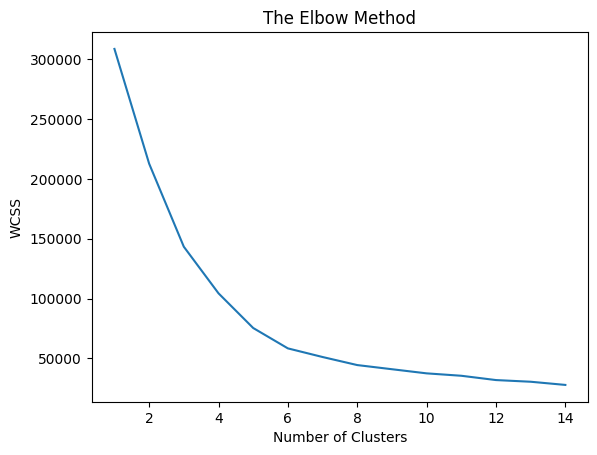

In [6]:
wcss = []
for i in range (1,15):
  kmeans =  KMeans(n_clusters= i, random_state= 14)
  kmeans.fit(x)

  wcss.append(kmeans.inertia_)

plt.plot(range(1, 15), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [9]:
kmeans = KMeans(n_clusters = 6, random_state = 14)
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=14)

In [11]:
kmeans.labels_

array([2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 0, 5, 2, 1,
       2, 5, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 3, 1, 3, 4, 3, 4, 3, 4, 3,
       1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3], dtype=int32)

In [12]:
hasil_kmeans = x.copy()
hasil_kmeans["clusters"] = kmeans.labels_
hasil_kmeans.head()

,Age,Annual Income (k$),Spending Score (1-100),clusters
0,19,15,39,2
1,21,15,81,5
2,20,16,6,2
3,23,16,77,5
4,31,17,40,2


Text(0, 0.5, 'Frekuensi')

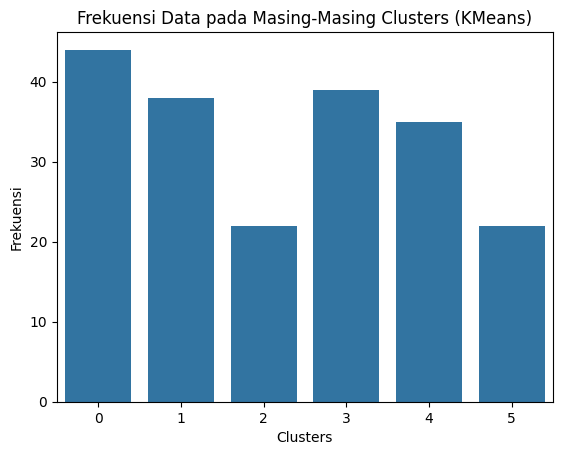

In [14]:
cluster_x = hasil_kmeans["clusters"].value_counts().index
cluster_y = hasil_kmeans["clusters"].value_counts().values
sns.barplot(x=cluster_x,y=cluster_y)
plt.title("Frekuensi Data pada Masing-Masing Clusters (KMeans)")
plt.xlabel("Clusters")
plt.ylabel("Frekuensi")

In [13]:
age_kmeans0 = hasil_kmeans[hasil_kmeans["clusters"] == 0].iloc[:, 0]
ann_kmeans0 = hasil_kmeans[hasil_kmeans["clusters"] == 0].iloc[:, 1]
spend_kmeans0 = hasil_kmeans[hasil_kmeans["clusters"] == 0].iloc[:, 2]
age_kmeans1 = hasil_kmeans[hasil_kmeans["clusters"] == 1].iloc[:, 0]
ann_kmeans1 = hasil_kmeans[hasil_kmeans["clusters"] == 1].iloc[:, 1]
spend_kmeans1 = hasil_kmeans[hasil_kmeans["clusters"] == 1].iloc[:, 2]
age_kmeans2 = hasil_kmeans[hasil_kmeans["clusters"] == 2].iloc[:, 0]
ann_kmeans2 = hasil_kmeans[hasil_kmeans["clusters"] == 2].iloc[:, 1]
spend_kmeans2 = hasil_kmeans[hasil_kmeans["clusters"] == 2].iloc[:, 2]
age_kmeans3 = hasil_kmeans[hasil_kmeans["clusters"] == 3].iloc[:, 0]
ann_kmeans3 = hasil_kmeans[hasil_kmeans["clusters"] == 3].iloc[:, 1]
spend_kmeans3 = hasil_kmeans[hasil_kmeans["clusters"] == 3].iloc[:, 2]
age_kmeans4 = hasil_kmeans[hasil_kmeans["clusters"] == 4].iloc[:, 0]
ann_kmeans4 = hasil_kmeans[hasil_kmeans["clusters"] == 4].iloc[:, 1]
spend_kmeans4 = hasil_kmeans[hasil_kmeans["clusters"] == 4].iloc[:, 2]
age_kmeans5 = hasil_kmeans[hasil_kmeans["clusters"] == 5].iloc[:, 0]
ann_kmeans5 = hasil_kmeans[hasil_kmeans["clusters"] == 5].iloc[:, 1]
spend_kmeans5 = hasil_kmeans[hasil_kmeans["clusters"] == 5].iloc[:, 2]
centroid_cluster = kmeans.cluster_centers_
centroid_cluster

array([[56.34090909, 53.70454545, 49.38636364],
       [27.        , 56.65789474, 49.13157895],
       [44.31818182, 25.77272727, 20.27272727],
       [32.69230769, 86.53846154, 82.12820513],
       [41.68571429, 88.22857143, 17.28571429],
       [25.27272727, 25.72727273, 79.36363636]])

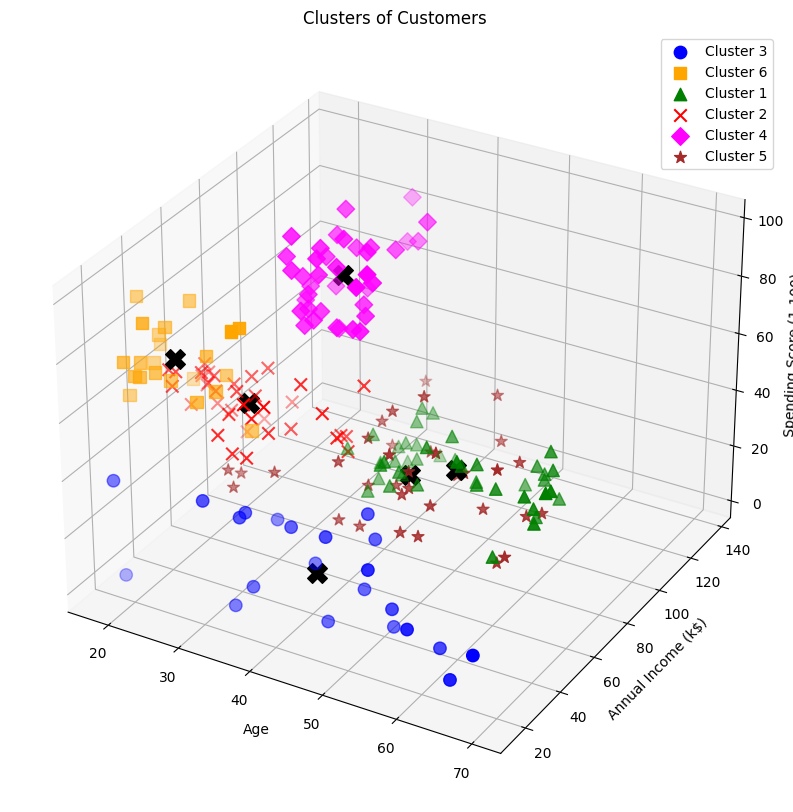

In [15]:
# plt.scatter(ann_kmeans0, spend_kmeans0, s = 80, c = "blue", label = "Cluster 1")
# plt.scatter(ann_kmeans1, spend_kmeans1, s = 80, c = "orange", label = "Cluster 2")
# plt.scatter(ann_kmeans2, spend_kmeans2, s = 80, c = "green", label = "Cluster 3")
# plt.scatter(ann_kmeans3, spend_kmeans3, s = 80, c = "red", label = "Cluster 4")
# plt.scatter(ann_kmeans4, spend_kmeans4, s = 80, c = "magenta", label = "Cluster 5")
# plt.scatter(centroid_cluster[:, 0], centroid_cluster[:, 1], s = 160, c = "black", label = "Centroids")
# plt.title("Clusters of custumers")
# plt.xlabel("Annual Income (k$)")
# plt.ylabel("Spending Score (1-100)")
# plt.legend()
# plt.show()

# def plot_3d_scatter(data, centroids):
#     clusters = data['clusters'].unique()
#     colors = ['blue', 'orange', 'green', 'red', 'magenta']
#     markers = ['o', 's', '^', 'x', 'D']

#     fig = plt.figure(figsize=(12, 10))
#     ax = fig.add_subplot(111, projection='3d')

#     for i, cluster in enumerate(clusters):
#         cluster_data = data[data['clusters'] == cluster]
#         ax.scatter(cluster_data['Age'], cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
#                    s=80, c=colors[i], marker=markers[i], label=f'Cluster {cluster+1}')
#         ax.scatter(centroids.iloc[i]['Age'], centroids.iloc[i]['Annual Income'], centroids.iloc[i]['Spending Score'],
#                    s=200, c='black', marker='X')  # Centroid

#     ax.set_xlabel('Age')
#     ax.set_ylabel('Annual Income (k$)')
#     ax.set_zlabel('Spending Score (1-100)')
#     ax.set_title('Clusters of Customers')
#     ax.legend()

#     plt.show()

def plot_3d_scatter(data, centroids):
    clusters = data['clusters'].unique()
    colors = ['blue', 'orange', 'green', 'red', 'magenta','brown']
    markers = ['o', 's', '^', 'x', 'D','*']

    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    for i, cluster in enumerate(clusters):
        cluster_data = data[data['clusters'] == cluster]
        ax.scatter(cluster_data['Age'], cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], s=80, c=colors[i], marker=markers[i], label=f'Cluster {cluster+1}')
        ax.scatter(centroids[i][0], centroids[i][1], centroids[i][2], s=200, c='black', marker='X')  # Centroid


    ax.set_xlabel('Age')
    ax.set_ylabel('Annual Income (k$)')
    ax.set_zlabel('Spending Score (1-100)')
    ax.set_title('Clusters of Customers')
    ax.legend()

    plt.show()

# Memanggil fungsi plot_3d_scatter dengan hasil_kmeans dan centroid_cluster
plot_3d_scatter(hasil_kmeans, centroid_cluster)

In [16]:
hasil_kmeans["CustomerID"] = data["CustomerID"]
hasil_kmeans.head()

,Age,Annual Income (k$),Spending Score (1-100),clusters,CustomerID
0,19,15,39,2,1
1,21,15,81,5,2
2,20,16,6,2,3
3,23,16,77,5,4
4,31,17,40,2,5
